**Задача:** выявить закономерности, определяющие успешность  компьютерной игры для дальнейшего планирования рекламных кампаний и закупок продукта для интернет-магазина компьютерных игр "Стримчик".

**Имеющийся датасет:** исторические данные до 2016 года включительно из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы

**План проекта:**
- Подготовка данных
- Исследовательский анализ данных
- Составление портрета пользователя для каждого региона
- Проверка гипотез
- Подведение итогов и выводы

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общее-и-план-проекта" data-toc-modified-id="Общее-и-план-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общее и план проекта</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#name" data-toc-modified-id="name-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>name</a></span></li><li><span><a href="#platform" data-toc-modified-id="platform-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>platform</a></span></li><li><span><a href="#year-of-release" data-toc-modified-id="year-of-release-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>year of release</a></span></li><li><span><a href="#genre" data-toc-modified-id="genre-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>genre</a></span></li><li><span><a href="#critic_score" data-toc-modified-id="critic_score-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>critic_score</a></span></li><li><span><a href="#user_score" data-toc-modified-id="user_score-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>user_score</a></span></li><li><span><a href="#Rating" data-toc-modified-id="Rating-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Rating</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Портрет-пользователя" data-toc-modified-id="Портрет-пользователя-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет пользователя</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-Средние-пользовательские-рейтинги-платформ-Xbox-One-и-PC-одинаковые;" data-toc-modified-id="Гипотеза-Средние-пользовательские-рейтинги-платформ-Xbox-One-и-PC-одинаковые;-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Гипотеза Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;</a></span></li><li><span><a href="#Гипотеза-Средние-пользовательские-рейтинги-жанров-Action-(англ.-«действие»,-экшен-игры)-и-Sports-(англ.-«спортивные-соревнования»)-разные." data-toc-modified-id="Гипотеза-Средние-пользовательские-рейтинги-жанров-Action-(англ.-«действие»,-экшен-игры)-и-Sports-(англ.-«спортивные-соревнования»)-разные.-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Гипотеза Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Общее и план проекта

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
#посмотрим на имеющиеся данные
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
#посмотрим на имеющиеся данные
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Предобработка данных

In [5]:
#приведем название колонок к нижнему регистру
df.columns = df.columns.str.lower()

In [6]:
#проверим количество явных дубликатов
(df.duplicated().sum()) 

0

### name

In [7]:
#посмотрим названия игр
df['name'].value_counts()

Need for Speed: Most Wanted                   12
Ratatouille                                    9
Madden NFL 07                                  9
LEGO Marvel Super Heroes                       9
FIFA 14                                        9
                                              ..
Shadow Tower                                   1
S.L.A.I.: Steel Lancer Arena International     1
Ninokuni: Shikkoku no Madoushi                 1
Babysitting Mama                               1
Hamtaro: Ham-Hams Unite!                       1
Name: name, Length: 11559, dtype: int64

Видим, что значения повторяются. Проверим на примере одной игры дубли это или нет

In [8]:
#срез по игре Need for Speed: Most Wanted
df.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хороший пример, когда одна и та же игра в один год на разных платформах имеет разные оценки отзывов и разный возрастной рейтинг. Да еще и выходит в разные года под одним названием.</font>

Игра выпущена на разных платформах или на одной платформе, но в разных годах, т.е это перевыпуск, а не дубли

In [9]:
#посмотрим на имющиеся пропуски
df.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропусков всего два, можно смело их удалить,на ислледование это не повлияет

In [10]:
#удалим пропуски
df=df.dropna(subset=['name'])

### platform

In [11]:
#посмотрим какие есть платформы
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

###  year of release

In [12]:
# посмотрим уникальные значения по году выпуска
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [13]:
#количество пропусков
df['year_of_release'].isna().sum()

269

Пропусков относительно не много, восстановить данные не возможно и заменить без искажения общей картины тоже. Удалим эти строки и изменим тип значений на целочисленный

In [14]:
#удалим пропуски и заменим тип данных year_of_release на int
df=df.dropna(subset=['year_of_release'])
df['year_of_release'] =df['year_of_release'].astype('int',errors='ignore')

### genre 

In [15]:
#посмотрим количество пропусков в столбце
df['genre'].isna().sum()

0

In [16]:
df['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

### critic_score

In [17]:
#посмотрим количество пропусков в столбце
df['critic_score'].isna().sum()

8461

Пропусков много,удалять их нельзя, заполнить средними или мединными значениями тоже. Большое количество пропусков может быть связано с тем что для игр ранних годов выпуска тогда не сущуствовало сервисов для оценки критиков. Для игр последних лет выпуска вероятно произошла ошибка при выгрузке, либо данных нет для совсем свежих игр.

In [18]:
#посмотрим, что это за пропуски
df.query('critic_score.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропуски стоят одновременно в столбцах с оценками пользователей, критиков и рейтинге, вероятно это все же технический сбой при выгрузке. Удалять данные строки мы не будем.

### user_score

In [19]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В данных есть значение tbd - to be determined - подлежит уточнению.

In [20]:
#посмотрим что это за строки 
df.query('user_score=="tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [21]:
df['user_score'].isna().sum()

6605

Пропусков как и данных подлежаших уточнению много, удалять их нельзя. Заменим значения tbd на nan, что позволит нам изменить тип данных на float64, тк сейчас в столбце значения типа object, что помешает в дальнейшем при расчетах. Большое количество пропусков возможно связано с ошибкой при выгрузке.

In [22]:
#заменим тип данных user_score и заменим значение tbd на Nan
df['user_score']=pd.to_numeric(df['user_score'],errors='coerce')

### Rating

In [23]:
#посмотрим количество пропусков
df['rating'].isna().sum()

6676

In [24]:
df.query('rating.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропусков вновь много и нет возможности заполнить данные какими-либо релевантными значениями. Рейтинг  ESRB  появился только в  1994 году, что объясняет пропуски для игр, выпущенных до 1994. Так же, возможнен вариант,что компании специально не получают рейтинг, тк это дополнительные затраты.

In [25]:
#заполним пропуски заглушкой
df['rating']=df['rating'].fillna('NR')

In [26]:
#проверим, что пропуски заполнились
df['rating'].isna().sum()

0

In [27]:
#проверим, что пропуски заполнились
df['rating'].unique()

array(['E', 'NR', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [28]:
#добавим столбец с суммарными продажами во всех регионах
df['total_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

In [29]:
#проверим, что столбец добавился
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NR,31.38


In [30]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
    print('-'* 25)
    print(col_l, temp[col_l].sort_values().unique())
    print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## Исследовательский анализ данных

Посмотрим сколько игр выпускалось в разные годы

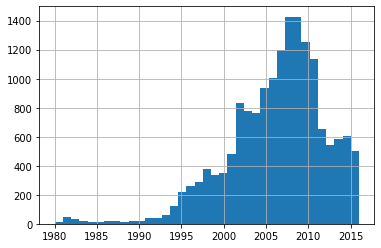

In [31]:
#построим гистограмму
df['year_of_release'].hist(bins=37);

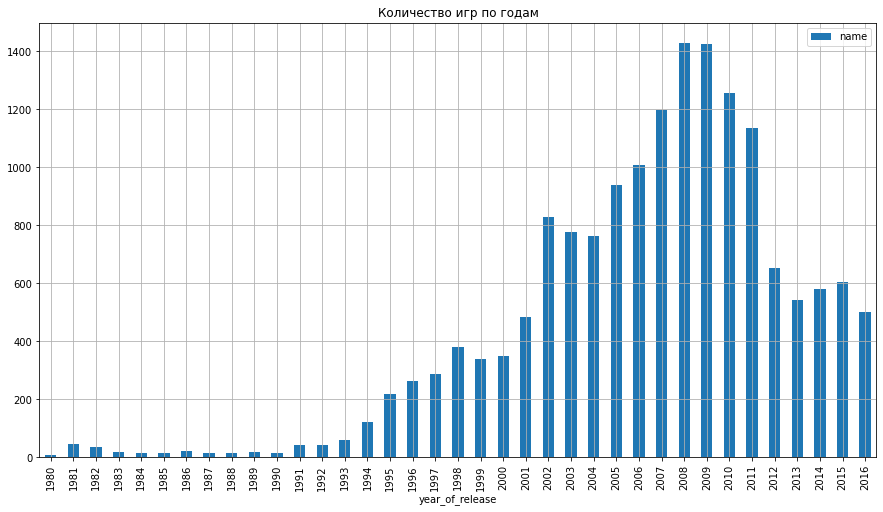

In [32]:
#для наглядности сделаем график
(df.pivot_table(index='year_of_release', values='name', aggfunc='count')
   .plot(title='Количество игр по годам',kind='bar',grid=True,figsize=(15,8)));

Распределение скошено влево. Видно как сильно увеличилось количество выпускаемых игр после 2000 года. Данные за раниий период(до 2000) будут уже не актуальны при дальнейшем исследовании. Так же видно, что после 2009 года пошел спад, что скорее всего связано с развитием рынка мобильных игр и "утечкой" игроков в сегмент мобильных игр.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

In [33]:
#сводная таблица продаж по платформам
total_sales_by_platform = df.pivot_table(index=['platform'], values=['total_sales'], aggfunc='sum')
#топ-10 платформ с наибольшими суммарными продажами
top10=total_sales_by_platform.sort_values(by=['total_sales'], ascending=False).head(10)
top10

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


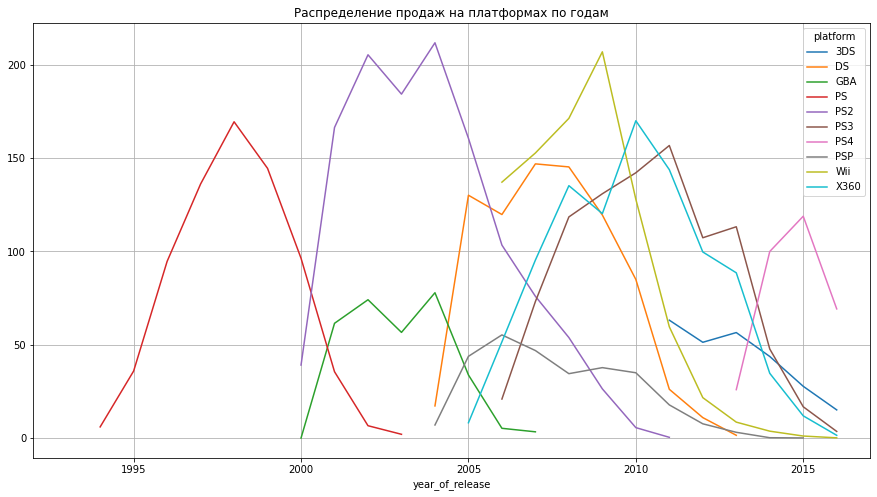

In [34]:
#построим график распределения продаж на платформах по годам
top10_by_years=(
    df.query('platform in @top10.index')
      .pivot_table(index='year_of_release',columns='platform', values='total_sales', aggfunc='sum')
      .plot(title='Распределение продаж на платформах по годам',xlim=(1992,2017),grid=True,figsize=(15,8)));

По графику видно, что срок жизни платформы примерно 10 лет, платформы достигают пика примерно через 4 года, потом наблюдается спад.

Срок жизни платформы примерно 10 лет, однако наблюдаемое на графиаках падение продаж на всех платформах с 2010 года  явно отражает глобальный тренд, которй необхоидмо учитывать. Обозначим актуальный период для прогноза на будущий год - 4 года. Возьмем данные по играм с 2013 года.

In [35]:
#сделаем срез по актуальным годам
df_actual_years=df.query('year_of_release > 2012')

In [36]:
df_actual_years['year_of_release'].value_counts()

2015    606
2014    581
2013    544
2016    502
Name: year_of_release, dtype: int64

Посмотрим какие платформы лидируют по продажам, растут или падают.

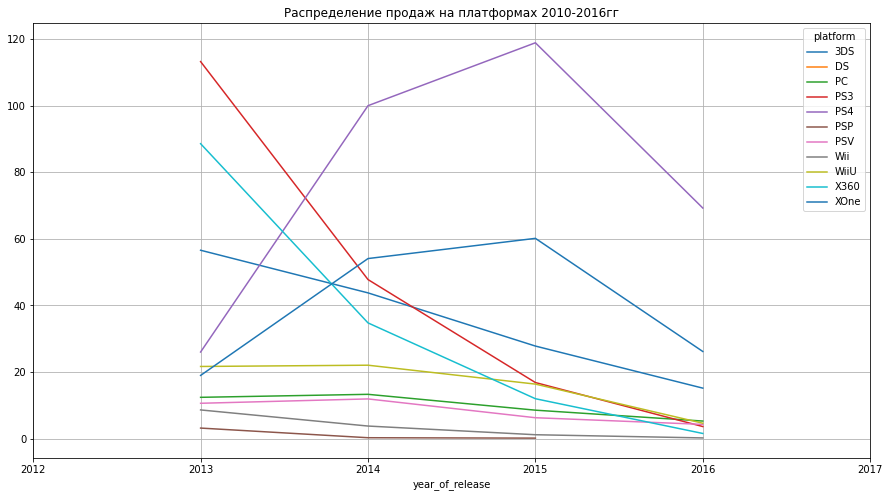

In [37]:
#посмотрим график распределения продаж на платформах по годам с 2010года
(df_actual_years
    .pivot_table(index='year_of_release',columns='platform', values='total_sales', aggfunc='sum')
    .plot(title='Распределение продаж на платформах 2010-2016гг',xlim=(2012,2017),grid=True,figsize=(15,8)));

Вновь наблюдается общий тренд на падение продаж на всех платформах. В послдений год больше всего продаж было на платформах PS4,XOne и 3DS. В 2013 году появились две новые платформы - PS4 и 3DS. Не смотря на то, что эти платформы показывают падение продаж в 2016, они могут быть потенциально прибыльны, тк были созданы совсем недаавно, вероятно будут наращивать количество продаваемых игр и сохранять интерес пользователя как новинка.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

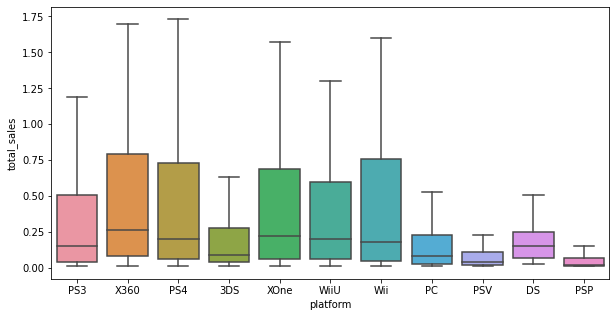

In [38]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = df_actual_years, x='platform', y='total_sales', showfliers=False);

(0.0, 2.0)

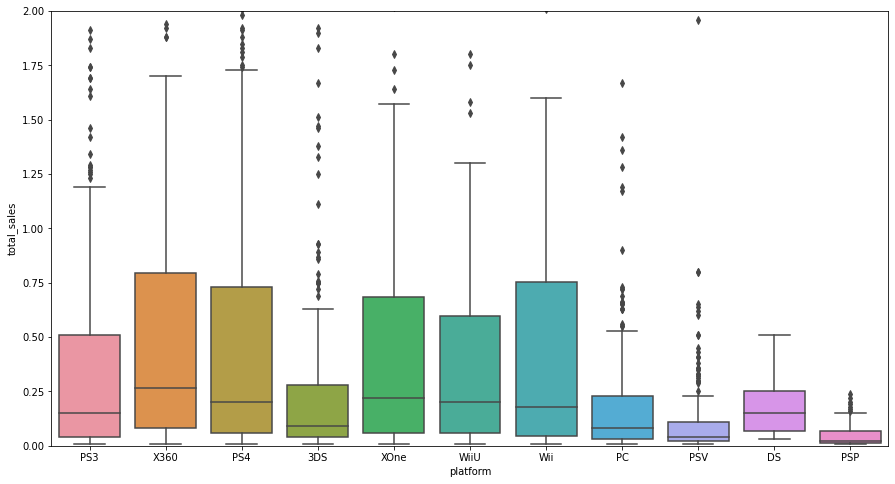

In [39]:
plt.figure(figsize=(15, 8))
ax=sns.boxplot(data = df_actual_years, x='platform', y='total_sales');
plt.ylim(0,2)

Игры на 5 платформах(PS3,PS4,X360,XOne,WiiU) - в среднем получают выручки больше чем игры на других платформах.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

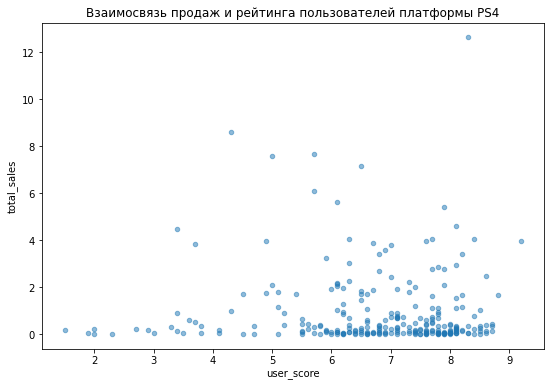

In [40]:
#возьмем срез по платформе PS4
ps4=df_actual_years.query('platform == "PS4"')
#построим диаграмму рассеяния
ps4.plot(title='Взаимосвязь продаж и рейтинга пользователей платформы PS4',x='user_score', y='total_sales',
         kind='scatter', alpha=0.5, figsize=(9,6));

In [41]:
#посчитаем коэффициент корреляции
ps4['total_sales'].corr(ps4['user_score'])

-0.031957110204556376

Корреляция  между рейтингами пользователей и продажами отрицательная и вцелом близка к нулю, зависимости нет, либо она нелинейная. Скорее всего пользователи не следят пристально за оценками других пользователей на рекомендательных сервисах, а пользуются другими критериями при выборе игры - например, влияение может оказывать стоимость игры, отзывы друзей и знакомых и тд.

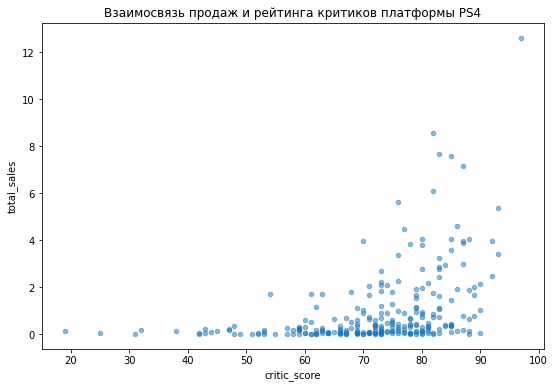

In [42]:
#построим диаграмму рассеяния
ps4.plot(title='Взаимосвязь продаж и рейтинга критиков платформы PS4',x='critic_score', y='total_sales',
         kind='scatter', alpha=0.5, figsize=(9,6));

In [43]:
#посчитаем коэффициент корреляции
ps4['total_sales'].corr(ps4['critic_score'])

0.406567902061781

In [44]:
#Посмотрим матрицу корреляции для всего датафрейма
ps4.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.248961,-0.208306,-0.060993,-0.234796,-0.021142,0.152447,-0.235032
na_sales,-0.248961,1.000000,0.785362,0.472981,0.944259,0.415008,-0.020933,0.928160
eu_sales,-0.208306,0.785362,1.000000,0.464563,0.944698,0.346720,-0.048925,0.958157
jp_sales,-0.060993,0.472981,0.464563,1.000000,0.496467,0.322358,0.171332,0.527129
other_sales,-0.234796,0.944259,0.944698,0.496467,1.000000,0.409191,-0.035639,0.998051
critic_score,-0.021142,0.415008,0.346720,0.322358,0.409191,1.000000,0.557654,0.406568
user_score,0.152447,-0.020933,-0.048925,0.171332,-0.035639,0.557654,1.000000,-0.031957
total_sales,-0.235032,0.928160,0.958157,0.527129,0.998051,0.406568,-0.031957,1.000000


Небольшая положительная корреляция есть. Мнение критиков влияет на продажи сильнее, чем мнение других игроков. Это может быть связано с авторитетом лидеров мнений(блогеры,обозреватели,журналы и тематические ресуры), а так же большим охватом их аудитории.
Если смотреть в распределении по странам, то оценка ползователей сильнее всего влияет в Японии, хотя это влияние все еще очень невелико.А оценка критиков сильнее всего влияет в Северной Америке.

Посмотрим продажи игр на других платформах.

In [45]:
#посчитаем корреляции  продаж для других платформ с отзывами критиков 
g0 = df_actual_years.groupby('platform')[['total_sales', 'critic_score']].corr().reset_index()
g1=g0.query('level_1 == "total_sales" and ~critic_score.isna()')
#отсортируем по самой высокой корреляции
g2=g1.loc[:,['platform','critic_score']].sort_values(by='critic_score',ascending=False)
g2

,platform,critic_score
20,XOne,0.416998
8,PS4,0.406568
16,WiiU,0.376415
0,3DS,0.357057
18,X360,0.350345
6,PS3,0.334285
12,PSV,0.254742
4,PC,0.196030


Самая высокая корреляция у платформы PS,но это все еще не очевидная сильная зависимость. Наименьшая зависимость от оценки критиков у игры на платформе PSV.

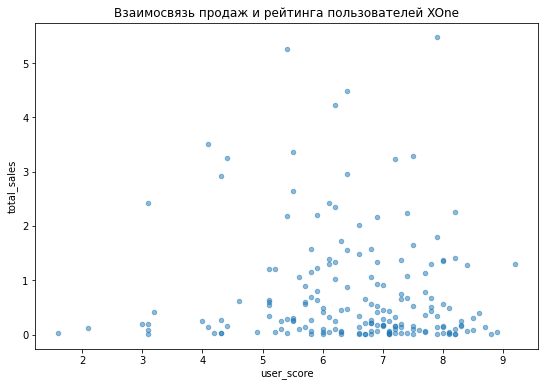

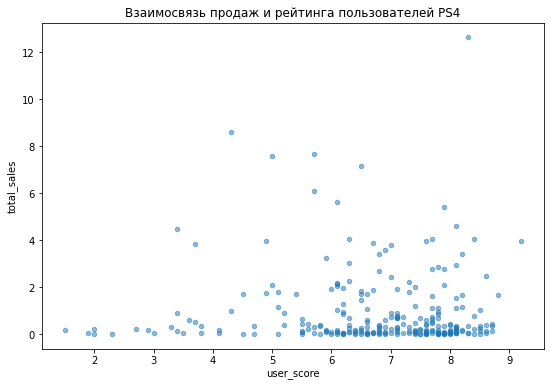

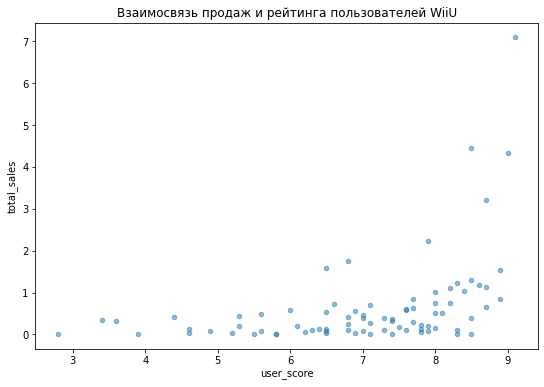

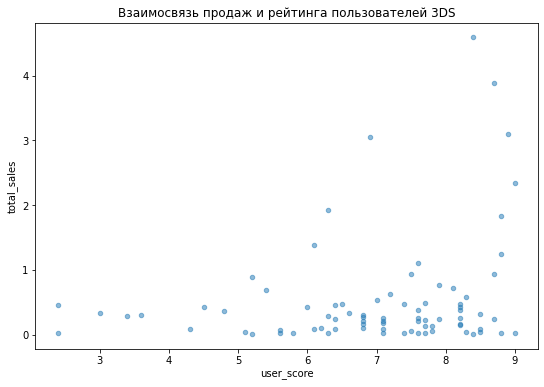

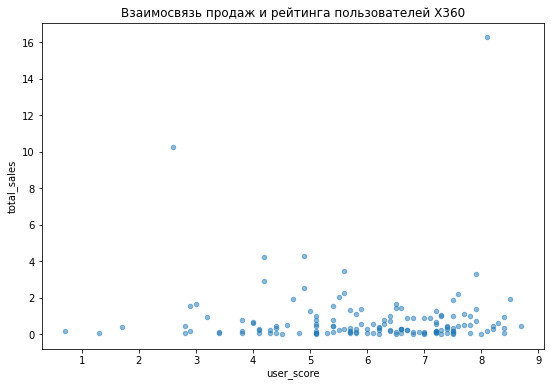

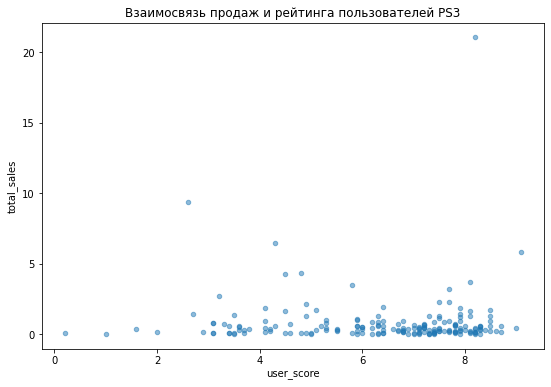

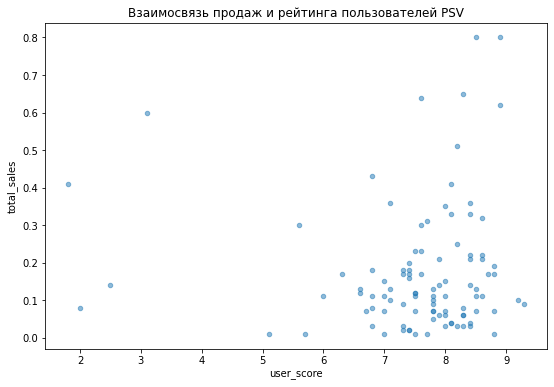

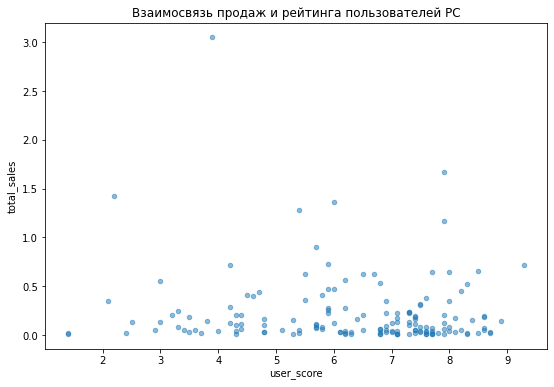

In [46]:
#напишем цикл, который построит диаграмму разброса для всех платформ
platform_critic_score=g2['platform']
for p in platform_critic_score:
    data=df_actual_years.query('platform == @p')
    data.plot(title='Взаимосвязь продаж и рейтинга пользователей '+p,x='user_score', y='total_sales',
         kind='scatter', alpha=0.5, figsize=(9,6));

In [47]:
#посчитаем корреляции  продаж для других платформ с отзывами пользователей 
g = df_actual_years.groupby('platform')[['total_sales', 'user_score']].corr().reset_index()
g3=g.query('level_1 == "total_sales" and ~user_score.isna()')
#отсортируем по самой высокой корреляции
g4=g3.loc[:,['platform','user_score']].sort_values(by='user_score',ascending=False)
g4

,platform,user_score
14,Wii,0.682942
16,WiiU,0.419330
0,3DS,0.241504
6,PS3,0.002394
12,PSV,0.000942
18,X360,-0.011742
8,PS4,-0.031957
20,XOne,-0.068925
4,PC,-0.093842
10,PSP,-1.000000


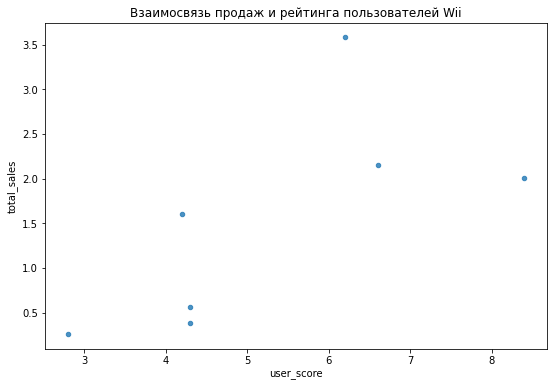

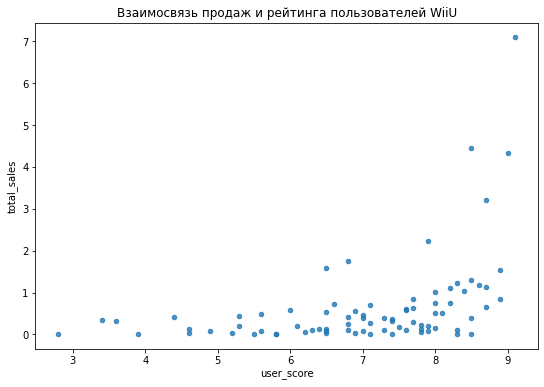

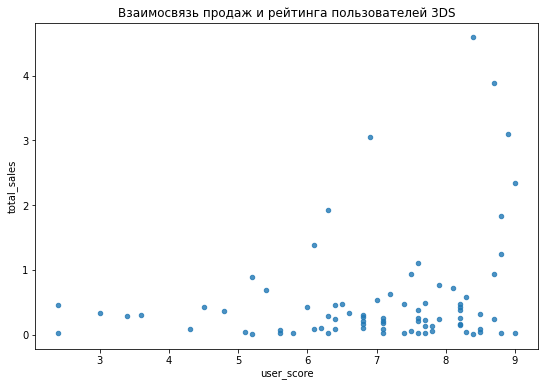

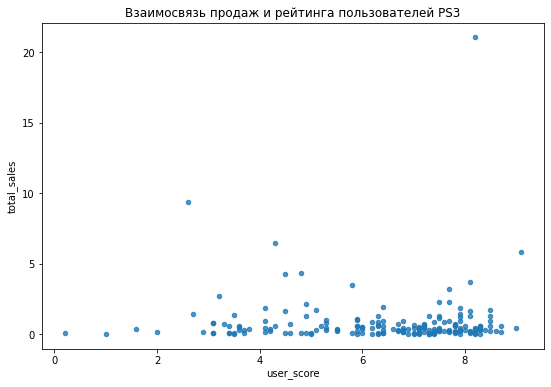

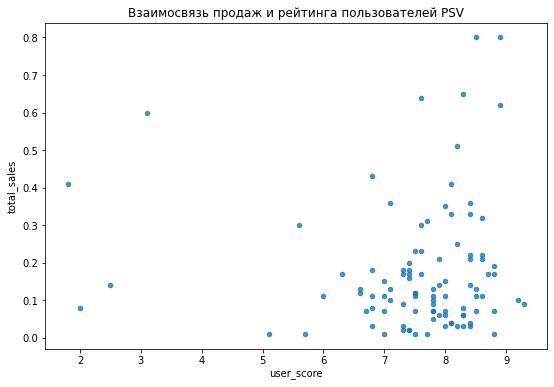

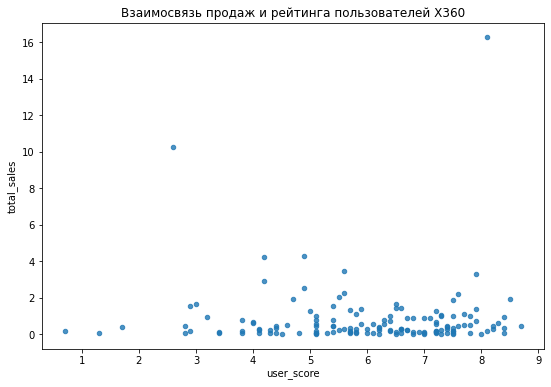

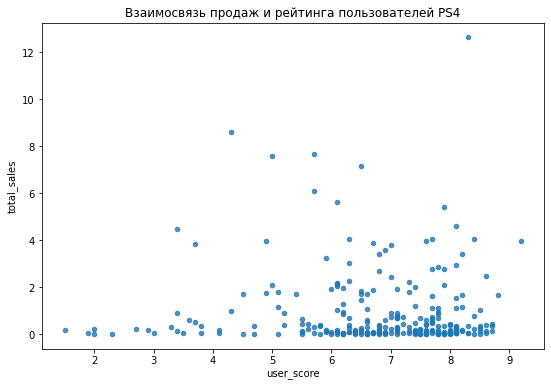

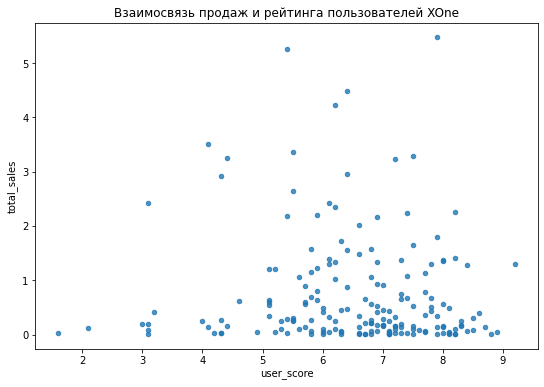

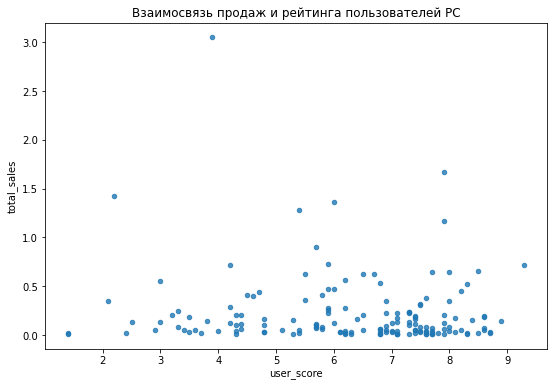

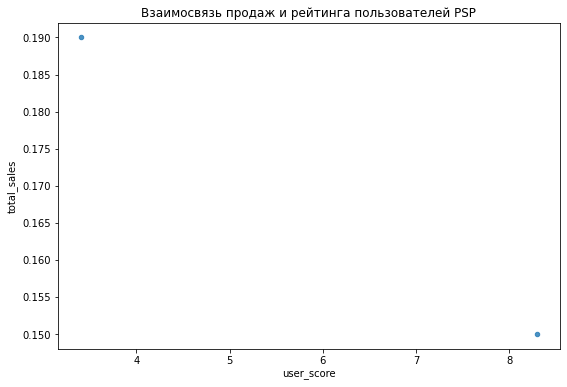

In [48]:
#напишем цикл, который построит диаграмму разброса для всех платформ
platform_user_score=g4['platform']
for p in platform_user_score:
    data=df_actual_years.query('platform == @p')
    data.plot(title='Взаимосвязь продаж и рейтинга пользователей '+p,x='user_score', y='total_sales',
         kind='scatter', alpha=0.8, figsize=(9,6));

С оценками пользователей ситуация несколько иная чем с оценками критиков. Наибольшая корреляция у платформы  WiiU 0.4, в то время как у рассмотренной ранее PS4 взаимосвязь оценками пользователей была отрицательной -0.03.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Для оценки корреляции лучше пользоваться вот этой шкалой:</font>
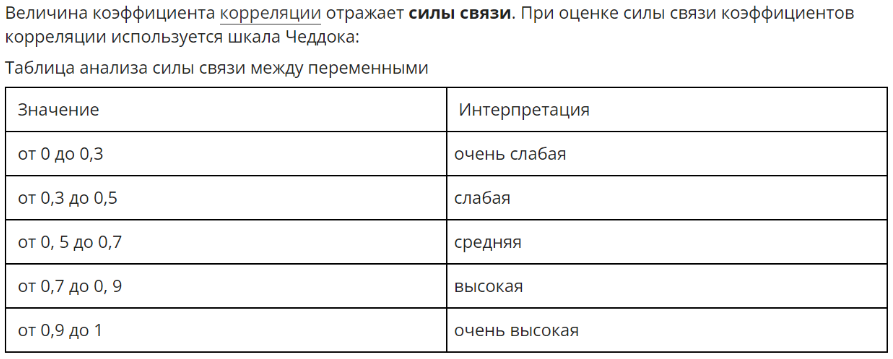

Посмотрим на общее распределение игр по жанрам. 

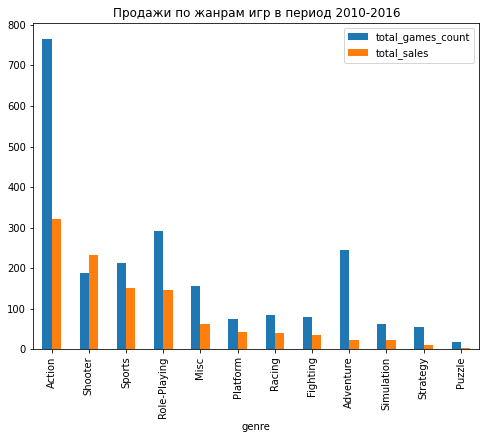

In [49]:
#построим график продаж по жанрам в период 2010-2016гг
total_sales_by_genre=df_actual_years.pivot_table(index='genre', values='total_sales', aggfunc=('sum','count'))
total_sales_by_genre.columns=('total_games_count','total_sales')
total_sales_by_genre.sort_values(by='total_sales', ascending=False).plot(title='Продажи по жанрам игр в период 2010-2016',kind='bar',figsize=(8,6));

Больше всего игр выходит так же в жанрах экшн и шутер,меньше всего - паззл.

(0.0, 2.0)

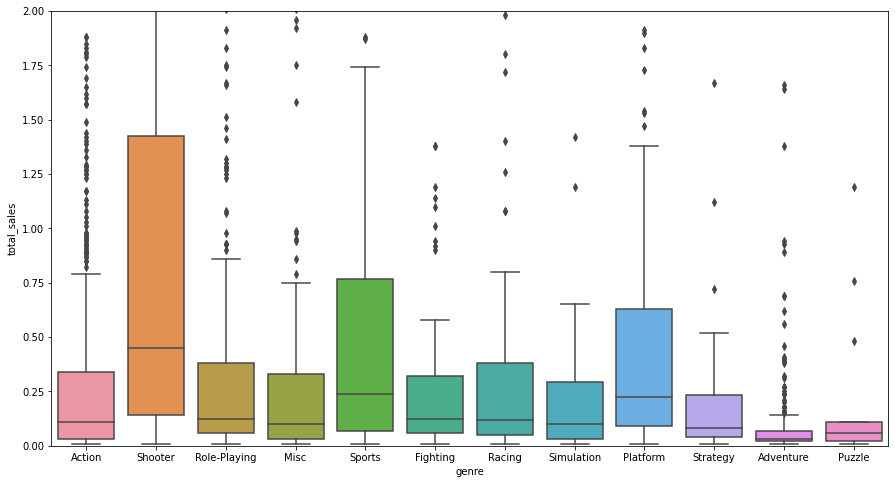

In [50]:
#добавим сравнение медианных продаж по жанрам, для этого построим диаграммы размаха
plt.figure(figsize=(15, 8))
ax=sns.boxplot(data = df_actual_years,
               x='genre',
               y='total_sales');
plt.ylim(0,2)

Медианная продажа выше всего у жанра шутер с достаточно большим отрывом, на втором месте спорт. Самые маленькие у жанров паззл и приключения.

## Портрет пользователя

In [51]:
#посмотрим распределение продаж по платформах в разных регионах
region_sales_by_platform = df_actual_years.pivot_table(index='platform',values=('na_sales','eu_sales','jp_sales'), aggfunc='sum')
region_sales_by_platform

,eu_sales,jp_sales,na_sales
platform,,,
3DS,30.96,67.81,38.20
DS,0.85,0.00,0.57
PC,25.36,0.00,11.11
PS3,67.81,23.35,63.50
PS4,141.09,15.96,108.74
PSP,0.17,3.29,0.00
PSV,6.10,18.59,5.04
Wii,5.93,0.05,6.56
WiiU,19.85,10.88,29.21


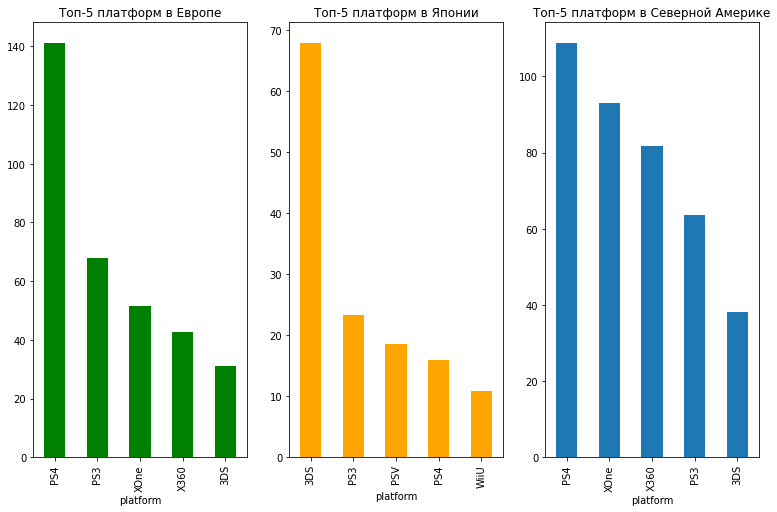

In [52]:
#построим график топ-5 платформ в каждом регионе
fig,(gr1,gr2,gr3)=plt.subplots(1,3)
region_sales_by_platform['eu_sales'].sort_values(ascending=False).head().plot(ax=gr1,title='Топ-5 платформ в Европе',kind='bar', figsize=(13,8), color='green');
region_sales_by_platform['jp_sales'].sort_values(ascending=False).head().plot(ax=gr2,title='Топ-5 платформ в Японии',kind='bar',color='orange');
region_sales_by_platform['na_sales'].sort_values(ascending=False).head().plot(ax=gr3,title='Топ-5 платформ в Северной Америке',kind='bar');

PS3 и PS4 входит в топ-5 во всех регионах, однако лидер продаж в каждом регионе свой - PS4  в Европе и Северной Америке и  3DS в Японии. Вцелом рынок Японии достаточно сильно отличается набором популярных платформ - в топ 5 водит WiiU, в Америке и Европе она не попала в топ.

In [53]:
#посмотрим распределение продаж по жанрам в разных регионах
region_sales_by_genre=df_actual_years.pivot_table(index='genre',values=('na_sales','eu_sales','jp_sales'),aggfunc='sum')
region_sales_by_genre

,eu_sales,jp_sales,na_sales
genre,,,
Action,118.13,40.49,126.05
Adventure,8.25,5.82,7.14
Fighting,8.55,7.65,15.55
Misc,20.04,9.20,27.49
Platform,15.58,4.79,18.14
Puzzle,1.00,1.18,0.83
Racing,20.19,2.30,12.96
Role-Playing,36.97,51.04,46.40
Shooter,87.86,6.61,109.74


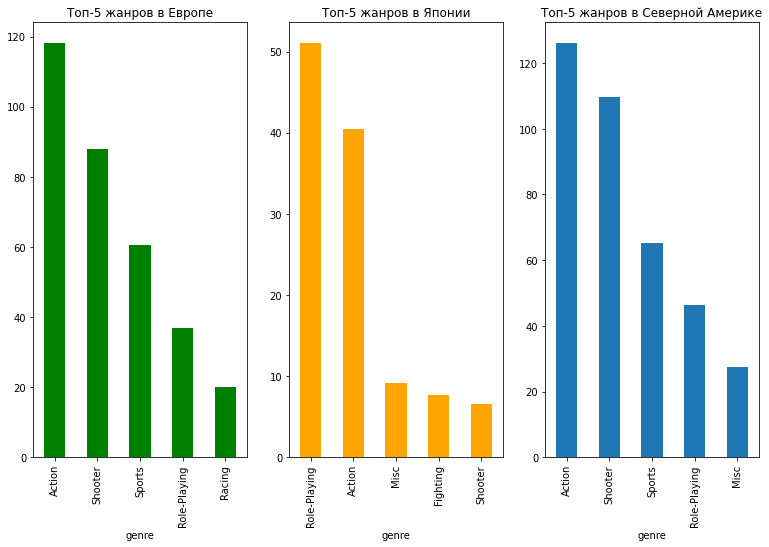

In [54]:
#построим график топ-5 жанров в каждом регионе
fig,(gr1,gr2,gr3)=plt.subplots(1,3)
region_sales_by_genre['eu_sales'].sort_values(ascending=False).head().plot(ax=gr1,title='Топ-5 жанров в Европе',kind='bar', figsize=(13,8),color='green');
region_sales_by_genre['jp_sales'].sort_values(ascending=False).head().plot(ax=gr2,title='Топ-5 жанров в Японии',kind='bar',color='orange');
region_sales_by_genre['na_sales'].sort_values(ascending=False).head().plot(ax=gr3,title='Топ-5 жанров в Северной Америке',kind='bar');

В Северной Америке и Европе предпочтения схожи - первые два места занимают жанры экшн и шутер. А вот в Японии лидирует жанр ролевой игры, а потом уже экшн. 

Влияние рейтинга ESRB на продажи в регионах.

In [55]:
esrb_by_region=df_actual_years.pivot_table(index='rating',values=('na_sales','eu_sales','jp_sales'),aggfunc='sum')
esrb_by_region

,eu_sales,jp_sales,na_sales
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
NR,78.91,85.05,89.42
T,41.95,20.59,49.79


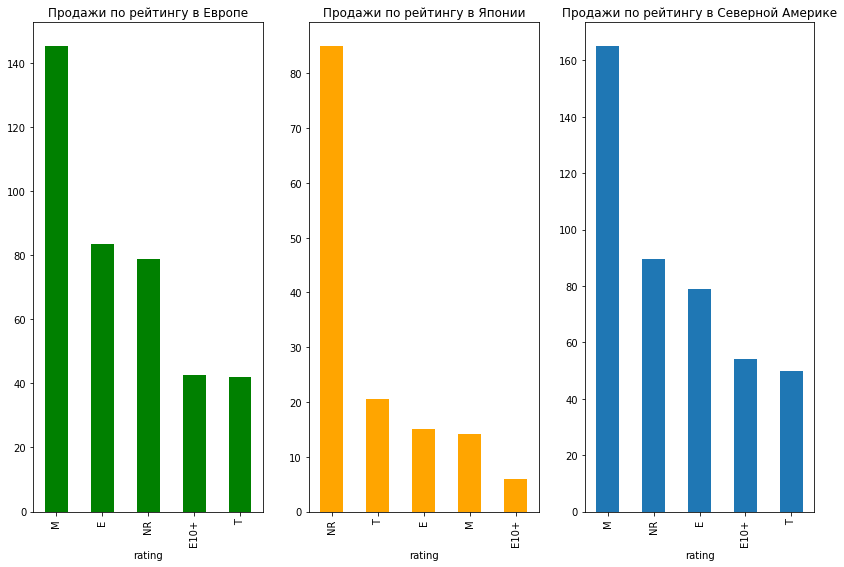

In [56]:
fig,(gr1,gr2,gr3)=plt.subplots(1,3)
esrb_by_region['eu_sales'].sort_values(ascending=False).plot(ax=gr1,title='Продажи по рейтингу в Европе',kind='bar', figsize=(14,9),color='green');
esrb_by_region['jp_sales'].sort_values(ascending=False).plot(ax=gr2,title='Продажи по рейтингу в Японии',kind='bar',color='orange');
esrb_by_region['na_sales'].sort_values(ascending=False).plot(ax=gr3,title='Продажи по рейтингу в Северной Америке',kind='bar');

В Северной Америке и Европе больше всего продаж игр с рейтингом M(игры для взрослых 17+), в Японии- лидируют игры, не имеющие маркировки ESRB, тк рейтинг составляется для Канады и Америки.

In [57]:
# Комментарий ревьюера
temp = df_actual_years.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


NR      977
M       369
T       333
E       302
E10+    252
Name: rating, dtype: int64

## Проверка гипотез

Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.


### Гипотеза Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Сформулируем гипотезы:

 - H_0: Пользовательский рейтинг (user_score) платформы Xbox One равнен пользовательсому рейтингу (user_score) платформы PC
 - H_a: Пользовательский рейтинг (user_score) платформы Xbox One не равен пользовательскому рейтингу (user_score) платформы PC
 - alpha = 0.05

Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства. 
Формулировка альтернативной гипотезы происходит из формулировки нулевой гипотезы, тк альтернативная гипотеза это утверждение,которое принимается верным, если получается отвергнуть нулевую гипотезу.
Следовательно нулевая гипотеза  отражает равенство пользовательских рейтингов двух платформ, а  альтернативная неравенство.

Для проверки гипотез мы будем использовать метод st.ttest_ind -  он используется, если нужно сравнить средние двух  независимых генеральных совокупностей между собой по взятым из них выборкам.
Параметр equal_var укажем равным False,тк мы не знаем точно равны ли дисперсии двух совокупностей.


In [58]:
pt1=df_actual_years.query('platform == "XOne" and ~user_score.isna()')['user_score']
pt2=df_actual_years.query('platform == "PC"and ~user_score.isna()')['user_score']

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(pt1,pt2,equal_var = False)
# alpha =  значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
        print('Не получилось отвергнуть нулевую гипотезу')

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


In [59]:
#посчитаем медианное значение для этих двух платформ
(df_actual_years.query('platform == "XOne" or platform == "PC"')
                .pivot_table(index='platform',values='user_score',aggfunc='mean'))

,user_score
platform,
PC,6.269677
XOne,6.521429


По результатам теста мы не смогли отвергнуть гипотезу о равенстве пользовательских рейтингов платформ Xbox One и PC. Подсчет медианных значений подтверждает что средние значения одинаковы.

### Гипотеза Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

 - H_0: Пользовательский рейтинг (user_score) жанра Action равнен пользовательсому рейтингу (user_score) жанра Sports
 - H_a: Пользовательский рейтинг (user_score) жанра Action  не равнен пользовательсому рейтингу (user_score) жанра Sports
 - alpha = 0.05

Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства. 
Формулировка альтернативной гипотезы происходит из формулировки нулевой гипотезы, тк альтернативная гипотеза это утверждение,которое принимается верным, если получается отвергнуть нулевую гипотезу.
Следовательно нулевая гипотеза  отражает равенство пользовательских рейтингов двух жанров игр, а  альтернативная неравенство.

Для проверки гипотез мы будем использовать метод st.ttest_ind -  он используется, если нужно сравнить средние двух  независимых генеральных совокупностей между собой по взятым из них выборкам.
Параметр equal_var укажем равным False,тк мы не знаем точно равны ли дисперсии двух совокупностей.

In [60]:
pt3=df_actual_years.query('genre == "Action" and ~user_score.isna()')['user_score']
pt4=df_actual_years.query('genre == "Sports"and ~user_score.isna()')['user_score']

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(pt3,pt4,equal_var = False)
# alpha =  значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
        print('Не получилось отвергнуть нулевую гипотезу')

1.4460039700704315e-20
Отвергаем нулевую гипотезу


In [61]:
(df_actual_years.query('genre == "Action" or genre == "Sports"')
                .pivot_table(index='genre',values='user_score',aggfunc='mean'))

,user_score
genre,
Action,6.837532
Sports,5.238125


По результатам теста мы отвергаем гипотезу о равенстве пользовательских рейтингов жанров Action и. Sports. Подсчет медианных значений подтверждает что средние значения различаются.

## Общий вывод

**Поставленная задача - определить закономерности успешности игры для планирования рекламных кампаний и закупок игр для магазина.** Для анализы взяты исторические данные из открытых источников о продажах игр, оценках пользователей и экспертов,платформах и жанрах игр.

**Проведена предобработка данных**. Названия столбцов приведены к нижнему регистру,изменен тип данных в столбцах год выпуска и рейтинг пользователей, удалены строки с пропусками в годах выпуска игры. Вероятно была техническая ошибка в выгрузке, тк отсутствует более 40% данных по оценкам пользователей и критиков.

**Проведен исследовательский анализ данных**
Количество выпускаемых игр существенно выросло после 2000 года. После 2009 года пошел спад, что скорее всего связано с развитием рынка мобильных игр и "утечкой" игроков в сегмент мобильных игр.Срок жизни платформы примерно 10 лет, платформы достигают пика примерно через 4 года, потом наблюдается спад.

Обозначим актуальный период для прогноза на будущий год - 4 года, для учета глобального тренда на спад за последние годы. Дальнейшие расчеты проведены для данных с 2013 года включительно.

С 2010 по 2016 гг наблюдается падение продаж на всех платформах. В 2016г больше всего продаж было на платформах PS4,XOne и 3DS. В 2013 году появились две новые платформы - PS4 и XOne,они же самые прибыльные в 2016г. Не смотря на то, что эти платформы показывают падение продаж в 2016, они могут быть потенциально прибыльны, тк были созданы совсем недавно, вероятно будут наращивать количество продаваемых игр и сохранять интерес пользователя как новинка.

Игры на 5 платформах(PS3,PS4,X360,XOne,WiiU) - в среднем получают выручки больше чем игры на других платформах.

Зависимости между отзывами пользователей и продажами нет, либо она нелинейная.Вероятно игроки не следят пристально за оценками других пользователей на рекомендательных сервисах, а пользуются другими критериями при выборе игры - например, влияение может оказывать стоимость игры, отзывы друзей, жанр и др.

Мнение критиков влияет на продажи сильнее, чем мнение других игроков. Это может быть связано с авторитетом лидеров мнений(блогеры,обозреватели,журналы и тематические ресуры), а так же большим охватом их аудитории. Если смотреть в распределении по странам, то оценка ползователей сильнее всего влияет в Японии, хотя это влияние все еще очень невелико.А оценка критиков сильнее всего влияет в Северной Америке.

Самые прибыльные жанры - шутер и спорт, хуже всего продаются игры с жанре паззл.Больше всего игр выходит так  в жанрах экшн и шутер,при этом жанр экшн сильно лидирует.

**Портрет пользователя**
В каждом регионе есть свои предпочтения по платформам и жанрам. Особняком стоит Япония, что в целом ожидаемо.  Рынки Европы и Северной Америки схожи,хотя имеют свои особенности.

PS3 и PS4 входит в топ-5 во всех регионах, однако лидер продаж в каждом регионе свой - PS4  в Европе и Северной Америке и  3DS в Японии. Вцелом рынок Японии достаточно сильно отличается набором популярных платформ - в топ 5 водит WiiU, в Америке и Европе она не попала в топ.

По жанрам в Северной Америке и Европе предпочтения схожи - первые два места занимают жанры экшн и шутер. А вот в Японии лидирует жанр ролевой игры, а потом уже экшн. 

В Северной Америке и Европе больше всего продаж игр с рейтингом M(игры для взрослых 17+), в Японии- лидируют игры, не имеющие маркировки ESRB, тк рейтинг составляется для Канады и Америки.

**Проверка гипотез**
Проведены тесты для проверки гипотез, по итогам теста отвергнута гипотеза о равенстве пользовательских рейтингов жанров экшн и спорт.Мы наблюдалии ранее,что игры в жанре экшн занимают существенно большую долю рынка по сравнению с остальными жанрами во всех регионах. Гипотеза о равенстве пользовательских рейтингов для платформ Xone и PC не была отвергнута, рейтинги одинаковы.

**Рекомендации относительно рекламных кампаний:**
1.Наиболее популярные платформы для Европы и Северной Америки - PS4, для Японии - 3DS.
2.Наиболее прибыльный жанр, с наибольшей медианной стоимостью - шутер и спорт. Два самых популярных жанра в Европе и Северной Америке - экшн и шутер. В Японии - ролевая игра и на втором месте экшн.
3.Оценки пользователей и критиков не оказывают существенно влияния на продажи игр. Но мнение критиков чуть более весомо.
4.Если фокусировать  усилия на рекламировании одной игры для каждого региона,то это будет:
- Шутер, рейтинг ESRB M,  на платформе PS4 для Северной Америки и Европы.
- Ролевая игра, без рейтинга ESRB, на платформе  3DS в Японии.